# Статистические критерии

Подключаем библиотеки для работы с таблицами и графиками

In [1]:
import pandas as pd
import seaborn as sns

Считаем таблицу сгруппированных данных, полученную на [шестом](lesson_006.ipynb) семенаре:

In [2]:
grouped_df = pd.read_csv('https://raw.githubusercontent.com/mikewellmeansme/biological-statistics-course/master/data/grouped_002.csv')

In [3]:
grouped_df.head(1)

,Year,Cells,Dmax,CWTmax,TRW
0,1900,25,45.675826,3.3212,868.245102


## Тесты на нормальность

Статистические критерии нормальности, нужны для того, чтобы формально определить взята ли наша выборка из нормального распределения,  или нет. 

$H_0$ — Выборка имеет нормальное распределение

$H_1$ — Выборка имеет не нормальное распределение

Из пакета `scipy` импортируем тест на нормальность распределения (Критерий Шапиро-Уилка):

In [4]:
from scipy.stats import shapiro

Посмотрим на то, как у нас выглядит распределение ширины годичных колец дерева:

<AxesSubplot:xlabel='TRW', ylabel='Count'>

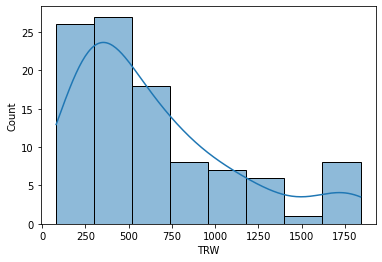

In [5]:
sns.histplot(grouped_df['TRW'], kde=True)

Визуально видим, что оно далеко от нормальности. Давайте проверим это при помощи статистического критерия:

In [23]:
stat, p = shapiro(grouped_df['TRW'])
print(f'stat={stat:.3f}, p={p:.3f}')
if p > 0.05:
	print('Распределение нормальное')
else:
	print('Распределение не нормальное')

stat=0.870, p=0.000
Распределение не нормальное


Функция `shapiro` возвращает два значения: значение статистики, и p-значение для этой статистики. Из прошлого занятия помним, что при малых p-значениях мы должны отвергнуть нулевую гипотезу.

Поскольку в нашем случае p-значение меньше $0.05$, мы отвергаем нулевую гипотезу и говорим, что выборка имеет не нормальное распределение.

Теперь давайте попробуем получить нормальное распределение.

Импортируем механизмы для построения линейной регрессии:

In [7]:
from numpy import (
    poly1d,
    polyfit
)

И посчитаем отношение ширины годичного кольца в году к значению линейной регресии:

In [8]:
x = grouped_df['Cells']
y = grouped_df['TRW']
coeffs = polyfit(x, y, deg=1)
f = poly1d(coeffs)
grouped_df['TRW/TRW(Cells)'] = grouped_df['TRW'] / f(grouped_df['Cells'])

По факту, мы взяли и для каждого года поделили реальную ширину годичного кольца, на предсказанную по следующей линейной модели:

<AxesSubplot:xlabel='TRW', ylabel='Cells'>

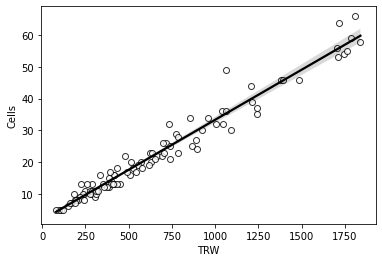

In [9]:
sns.regplot(
    x='TRW',
    y='Cells',
    data=grouped_df,
    scatter_kws={'edgecolor':'k', 'color':'w'},
    line_kws={'color': 'k'}
)

Теперь посмотрим, как выглядит распределение отношений:

<AxesSubplot:xlabel='TRW/TRW(Cells)', ylabel='Count'>

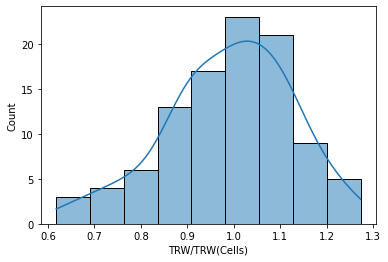

In [10]:
sns.histplot(grouped_df['TRW/TRW(Cells)'], kde=True)

Видим, что визуально это распределение больше походит на нормальное. Но чтобы не быть голословными, давайте проверим его при помощи стат критерия:

In [22]:
stat, p = shapiro(grouped_df['TRW/TRW(Cells)'])
print(f'stat={stat:.3f}, p={p:.3f}')
if p > 0.05:
	print('Распределение нормальное')
else:
	print('Распределение не нормальное')

stat=0.982, p=0.187
Распределение нормальное


Как видим, в этот раз p-значение больше $0.05$, то есть, отвергнуть нулевую гипотезу о нормальности распределения, не получается.

Следовательно, мы говорим, что в этом случае распределение, с большой долей уверенности, нормальное.

Существует множество статистических критериев проверки нормальности распределения, но проще всегда использовать критерий Шапиро-Уилка — он имеет наибольшую мощность из всех критериев нормальности, а также требует лишь чтобы все наблюдения внутри выборки были независимыми и взятыми из одного распределения.

## Параметрические критерии

Параметрические критерии нужны чтобы сравнивать между собою нормально распределённые величины. Чаще всего эти критерии также требуют равенство дисперсий.

В реальности наши данные далеко не всегда нормально распределены.

Как и в случае с TRW, CWTmax не распределено нормально:

<AxesSubplot:xlabel='CWTmax', ylabel='Count'>

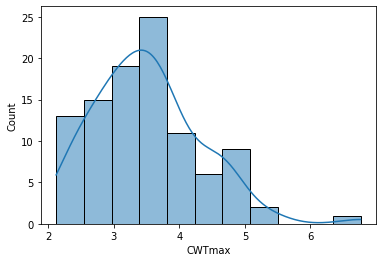

In [114]:
sns.histplot(grouped_df['CWTmax'], kde=True)

Однако если мы полсчитаем отношение CWTmax к линейной регресии, наше распределение получится более нормальным:

<AxesSubplot:xlabel='CWTmax', ylabel='Cells'>

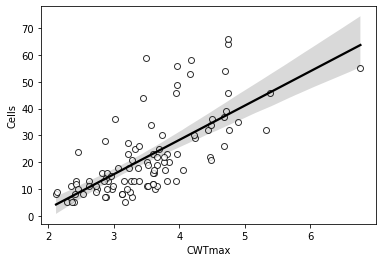

In [12]:
x = grouped_df['Cells']
y = grouped_df['CWTmax']
coeffs = polyfit(x, y, deg=1)
f = poly1d(coeffs)
grouped_df['CWTmax/CWTmax(Cells)'] = grouped_df['CWTmax'] / f(grouped_df['Cells'])
sns.regplot(
    x='CWTmax',
    y='Cells',
    data=grouped_df,
    scatter_kws={'edgecolor':'k', 'color':'w'},
    line_kws={'color': 'k'}
)

<AxesSubplot:xlabel='CWTmax/CWTmax(Cells)', ylabel='Count'>

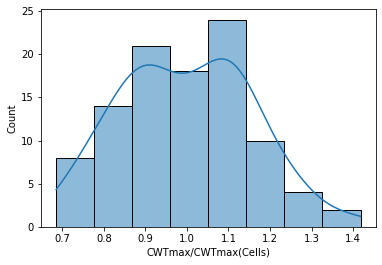

In [13]:
sns.histplot(grouped_df['CWTmax/CWTmax(Cells)'], kde=True)

Настолько, что даже по критерию нормальности оно будет определяться нормальным:

In [21]:
stat, p = shapiro(grouped_df['CWTmax/CWTmax(Cells)'])
print(f'stat={stat:.3f}, p={p:.3f}')
if p > 0.05:
	print('Распределение нормальное')
else:
	print('Распределение не нормальное')

stat=0.985, p=0.330
Распределение нормальное


Чтобы сравнить два нормальных распределения по критерию Стьюдента либо при помощи дисперсионного анализа, требуется равенство дисперсий двух выборок (что тоже случается далеко не всегда):

In [104]:
grouped_df['TRW/TRW(Cells)'].var()

0.01868782741262966

In [105]:
grouped_df['CWTmax/CWTmax(Cells)'].var()

0.025033507800842406

Как видим, в нашем случае, дисперсии не равны, но довольно близки друг к другу. Поскольку мы рассматриваем пример, скажем, что нам этого хватит.

Сравним наши распределения визуально:

<AxesSubplot:xlabel='TRW/TRW(Cells)', ylabel='Density'>

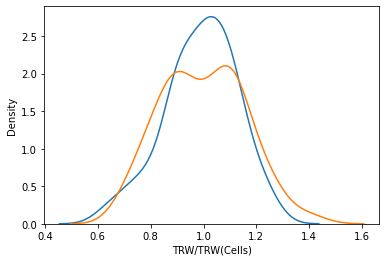

In [103]:
sns.kdeplot(grouped_df['TRW/TRW(Cells)'])
sns.kdeplot(grouped_df['CWTmax/CWTmax(Cells)'])

Конечно, общие формы схожи, но однозначно сказать, что распределения одинаковы мы не можем.

Прибегнем к помощи критерия Стьюдента:

$H_0$ — Средние значения двух выборок одинаковы

$H_1$ — Средние значения двух выборок не одинаковы

In [15]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(
	grouped_df['TRW/TRW(Cells)'],
	grouped_df['CWTmax/CWTmax(Cells)']
)
print(f'stat={stat:.3f}, p={p:.3f}')
if p > 0.05:
	print('Распределения одинаковы')
else:
	print('Распределения отличаются')

stat=-0.464, p=0.643
Распределения одинаковы


Критерий Стьюдента утверждает, что выборки распределены нормально.

Как и дисперсионный анализ (ANOVA):

$H_0$ — Средние значения двух выборок одинаковы

$H_1$ — Средние значения двух выборок не одинаковы

In [16]:
from scipy.stats import f_oneway
stat, p = f_oneway(
    grouped_df['TRW/TRW(Cells)'],
	grouped_df['CWTmax/CWTmax(Cells)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Распределения одинаковы')
else:
	print('Распределения отличаются')

stat=0.216, p=0.643
Распределения одинаковы


Что это означает? Что отклонения ширин годичных колец от линейной модели, распределены примерно так же, как и отклонения толщин клеточных стенок от их линейной модели.

Если подумать, то это весьма логично — метод наименьших квадратов пытается провести прямую линию, которая лучше всего бы описывала тенденцию в наших данных, тем самым невольно разделяя наши данные почти пополам — выше и ниже прямой линии.

Мы не говорим, что любые отношения данных к их линейной модели будут распределены нормально (например это неверно для Dmax, в чём вы можете сами убедиться), но подобное встречается довольно часто.

## Непараметрические критерии

Непараметрические критерии, нужны для сравнения выборок взятых из ненормальных распределений.

Считаем исходную таблицу из [шестого](lesson_006.ipynb) занятия (данные по клеточным размерам за 100 лет) и сохраним её в переменную `df`:

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/mikewellmeansme/biological-statistics-course/master/data/002.csv')

In [18]:
df.head(1)

,Year,№,D1,CWT1,D2,CWT2,D3,CWT3,D4,CWT4,D5,CWT5
0,1900,1,29.732192,1.97862,30.939511,2.380663,52.044985,2.718184,50.164903,2.054598,43.016125,2.584435


Посмотрим на то, как у нас распределены диаметры клеток в первых рядах:

<AxesSubplot:xlabel='D1', ylabel='Count'>

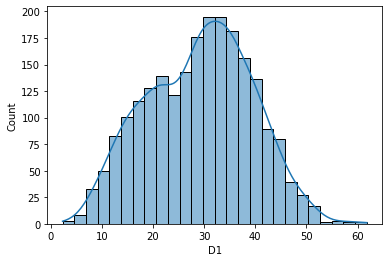

In [25]:
sns.histplot(df['D1'], kde=True )

Видим, что их распределение далеко от нормального:

In [20]:
stat, p = shapiro(df['D1'])
print(f'stat={stat:.3f}, p={p:.3f}')
if p > 0.05:
	print('Распределение нормальное')
else:
	print('Распределение не нормальное')

stat=0.991, p=0.000
Наспределение не нормальное


И критерий Шапиро-Уилка это подтверждает. С толщинами клеточных стенок всё аналогично.

Если посмотрим на boxplot'ы `D1` и `CWT1`, увидим, что они полностью отличаются и по диапазону, и по размаху, и по медиане:

<AxesSubplot:xlabel='variable', ylabel='value'>

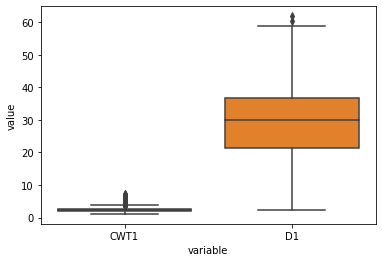

In [40]:
sns.boxplot(
    data=pd.melt(df[['CWT1', 'D1']]),
    x='variable',
    y='value'
)

То есть, `CWT1` и `D1` имеют разные распределения. Чтобы обозначить это фнормально прибегнем к критерию Манна-Уитни:

$H_0$ — Распределения двух выборок одинаковы

$H_1$ — Распределения двух выборок не одинаковы

In [36]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df['CWT1'], df['D1'])
print(f'stat={stat:.3f}, p={p:.3f}')
if p > 0.05:
	print('Распределения одинаковы')
else:
	print('Распределения отличаются')

stat=1533.000, p=0.000
Распределения отличаются


Поскольку p-значения для статистики критерия меньше $0.05$, то мы отвергаем нулевую гипотезу о равенстве распределений.

Однако у нас может возникнуть ситуация, когда сравнить нужно не два распределения, а больше, например `D1`-`D5`:

<AxesSubplot:xlabel='D1', ylabel='Density'>

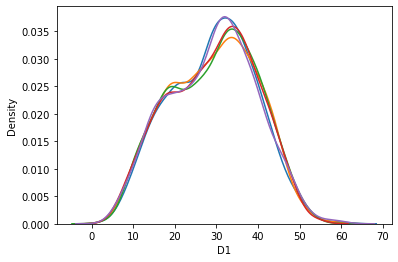

In [30]:
sns.kdeplot(df['D1'])
sns.kdeplot(df['D2'])
sns.kdeplot(df['D3'])
sns.kdeplot(df['D4'])
sns.kdeplot(df['D5'])

Визуально мы видим, что они почти что идентичны

<AxesSubplot:xlabel='variable', ylabel='value'>

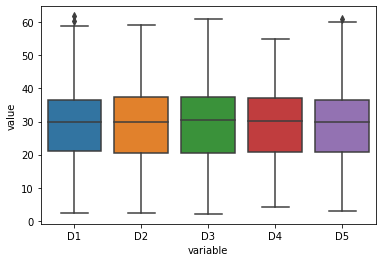

In [43]:
sns.boxplot(
    data=pd.melt(df[['D1', 'D2', 'D3', 'D4', 'D5']]),
    x='variable',
    y='value'
)

Даже boxplot'ы для них почти равны. Однако для того, чтобы формально обозначить равенство распределений, нам потребуется многомерный аналог критерия Манна-Уитни, критерий Краскела-Уолиса:

$H_0$ — Распределения всех выборок одинаковы

$H_1$ — Распределения двух или более выборок не одинаковы

In [41]:
from scipy.stats import kruskal
stat, p = kruskal(
	df['D1'],
	df['D2'],
	df['D3'],
	df['D4'],
	df['D5'],
)
print(f'stat={stat:.3f}, p={p:.3f}')
if p > 0.05:
	print('Распределения одинаковы')
else:
	print('Распределения отличаются')

stat=1.485, p=0.829
Распределения одинаковы


Как мы видим, этот критерий говорит о равенстве распределений всех выборок.

Однако у такого критерия есть неприятная особенность: если мы захотим говорить об отличие выборок, а не об их равенстве, он сработает и в том случае, когда у нас будет иметься четыре выборки с одинаковым распределением и одна с отличным. Если мы хотим доказать взаимное неравенство выборок, лучше попарно сравнить их при помощи Манна-Уитни, или прибегнуть к иным критериям.

# Задание

* Постройте гистограмму для `C1`;

* Проверьте на нормальность распределение `C1`;

* Постройте графики ядерных оценок плотности для `C1`-`C5` на одном полотне;

* Сравните выборки `C1`-`C5` при помощи критери Краскела-Уолиса и объясните результат сравнения.

# Полезные ссылки

[17 Statistical Hypothesis Tests in Python (Cheat Sheet)
](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) — шпаргалка по статистическим критериям в Python.